In [3]:
import seaborn as sns
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

# Visualizing relationships

**Goals.** Present visual tools for exploring the relationship between the target and predictors.

**Topics.**
1. Side-by-side boxplots to visualize the relationship between categorical predictors and a numeric target.
2. Pairs plot to visualize the relationship between numeric predictors and a numeric target.


In [5]:
(penguins :=
 pl.from_pandas(sns.load_dataset("penguins")
               )
)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,f64,f64,f64,f64,str
"""Adelie""","""Torgersen""",39.1,18.7,181.0,3750.0,"""Male"""
"""Adelie""","""Torgersen""",39.5,17.4,186.0,3800.0,"""Female"""
"""Adelie""","""Torgersen""",40.3,18.0,195.0,3250.0,"""Female"""
"""Adelie""","""Torgersen""",null,null,null,null,null
"""Adelie""","""Torgersen""",36.7,19.3,193.0,3450.0,"""Female"""
…,…,…,…,…,…,…
"""Gentoo""","""Biscoe""",null,null,null,null,null
"""Gentoo""","""Biscoe""",46.8,14.3,215.0,4850.0,"""Female"""
"""Gentoo""","""Biscoe""",50.4,15.7,222.0,5750.0,"""Male"""


## Topic 1 - Visualizing the relationship between categorical predictors and a numeric response with boxplots.

### Plotting the marginal distributions.

To plot the marginal distributions, we need to

1. Stack the predictors using `unpivot` keeping the target as a index,
2. Plot the label column (X) vs. the target (Y),
3. Facet on the predictor column.


#### Step 1 - Stacking the predictors

In [6]:
(cat_predictors :=
 penguins
 .select(cs.by_name('body_mass_g') | cs.string())
 .unpivot(cs.string(),
          index = 'body_mass_g',
          variable_name = 'predictor',
          value_name = 'label')
 .to_pandas()
)

,body_mass_g,predictor,label
0,3750.0,species,Adelie
1,3800.0,species,Adelie
2,3250.0,species,Adelie
3,NaN,species,Adelie
4,3450.0,species,Adelie
...,...,...,...
1027,NaN,sex,None
1028,4850.0,sex,Female
1029,5750.0,sex,Male
1030,5200.0,sex,Female


#### Step 2a - Using `sns.catplot`

**Note.** To get boxplots, we use `kind='box'`

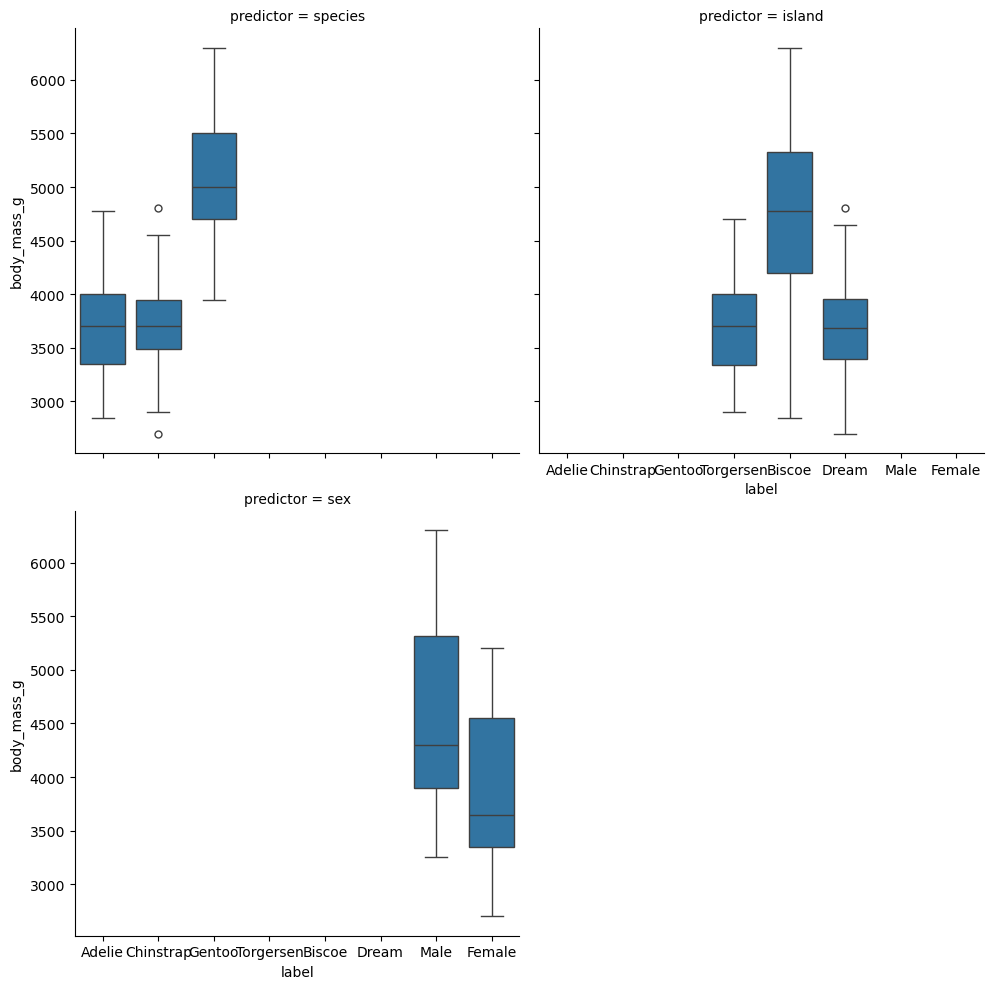

In [7]:
sns.catplot(
    data=cat_predictors, x='label', y='body_mass_g',
    col='predictor', kind='box', col_wrap=2
)

### What's a strong relationship look like?

1. Big differences between labels, but
2. Small differences within labels.

### Plotting the joint relationships

To plot the joint relationships, we will use a `sns.catplot` to

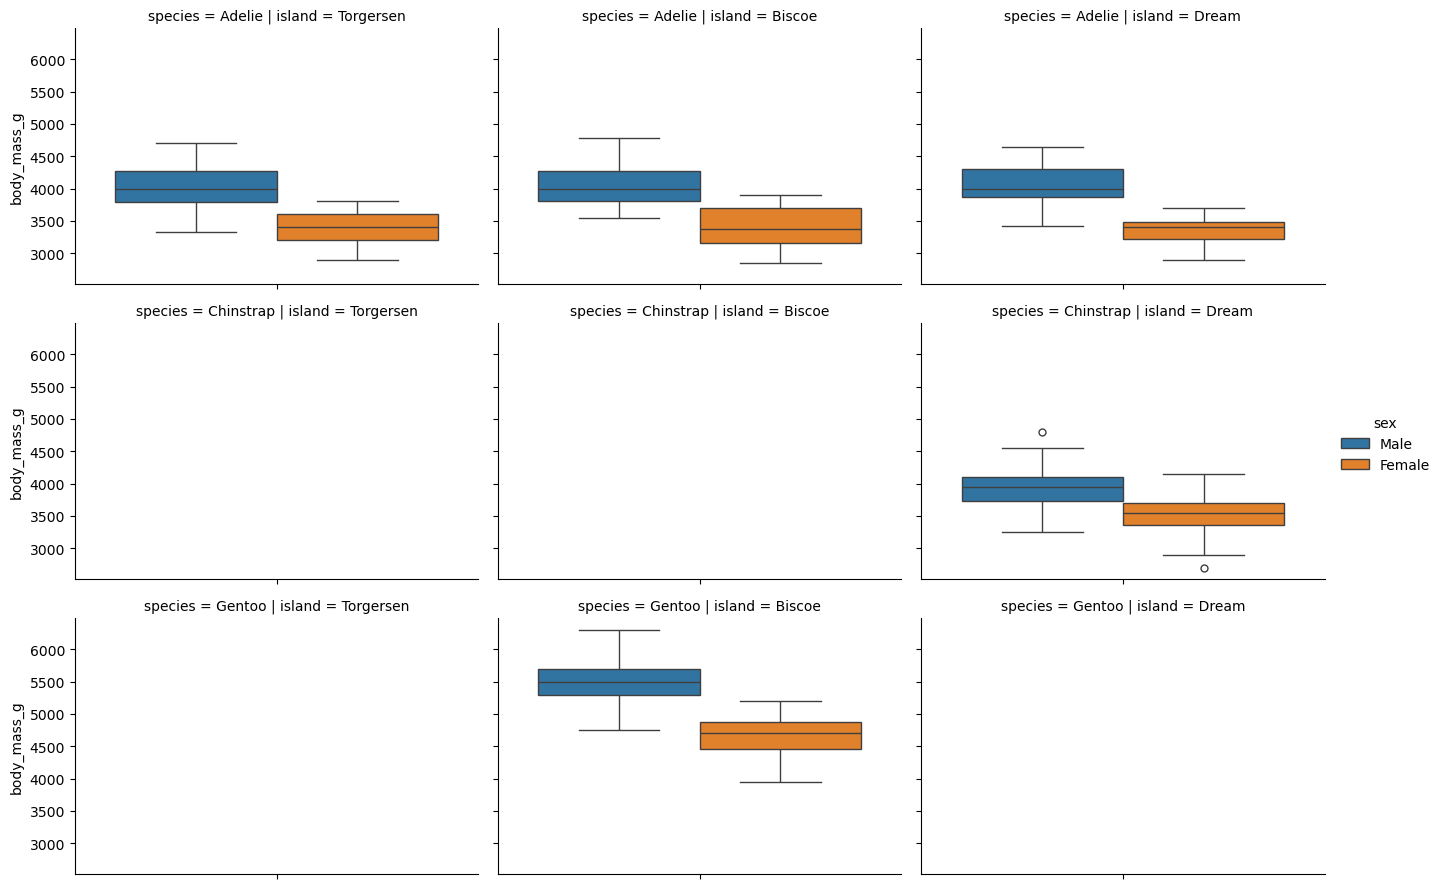

In [8]:
sns.catplot(
    data=penguins.to_pandas(), y='body_mass_g',
    row='species', col='island', hue='sex',
    kind='box', height=3, aspect=1.5
)

### What does a strong joint relationship look like?

1. Big differences between combinations of labels, but
2. Small differences within combinations of labels.

## Topic 2 - Visualizing relationships between numeric predictors and a numeric target.

### Plotting the marginal distributions with a pairs plot

### With `sns.pairplot`

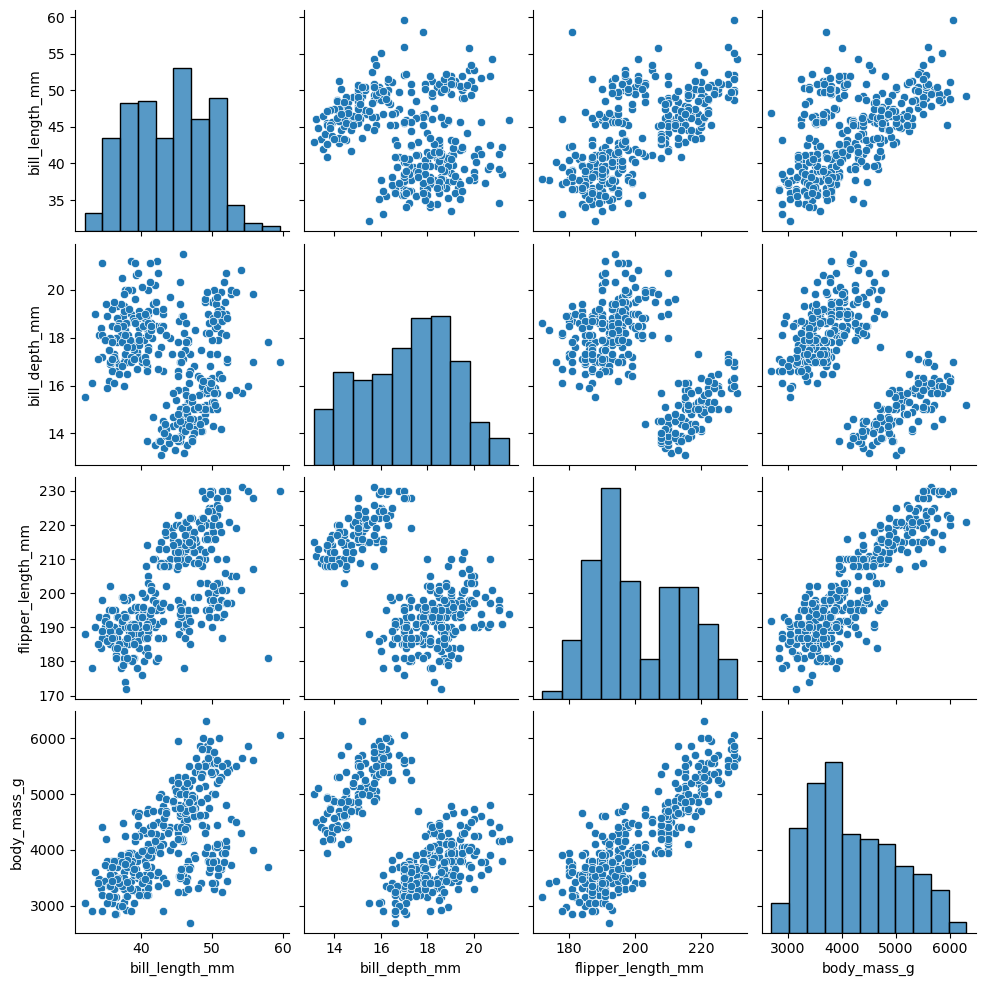

In [10]:
sns.pairplot(penguins.to_pandas())


### Visualizing the joint distribution between numeric and categorical predictors using `hue`

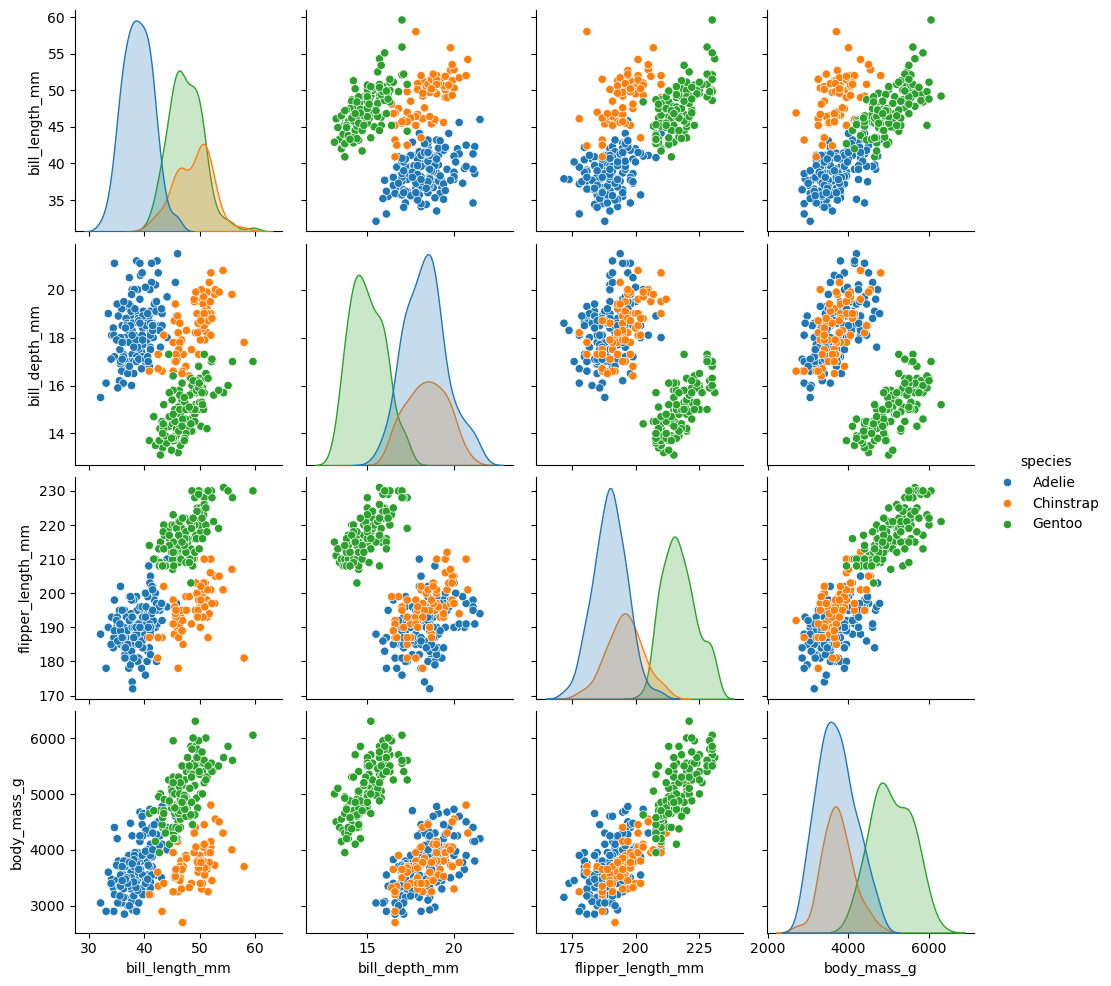

In [11]:
sns.pairplot(penguins.to_pandas(), hue='species')

## Pairs plus

We can aid the visualization by adding a smoother to each plot, which will allow us to idenfity non-linear relationships.  This can be done by using a `sns.PairGrid` to add finer control over the plots, in this case we want
- The diagonal plots to be histograms/KDE, and
- The off-diagonal plots to be `regplot`s that use a `lowess` smoother.

### Example 1 - Ignoring species

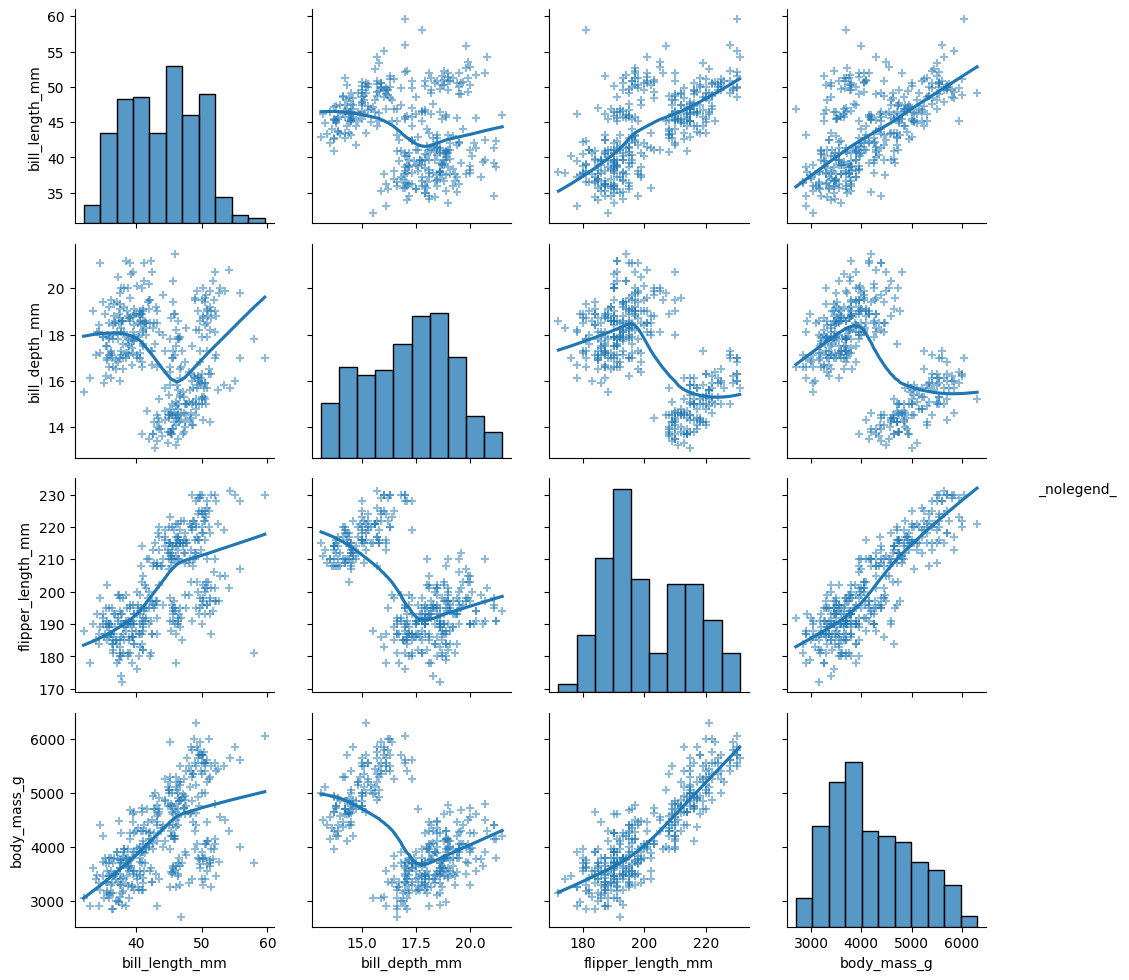

In [63]:
g = sns.PairGrid(penguins.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()


### Example 2 - Grouping by species

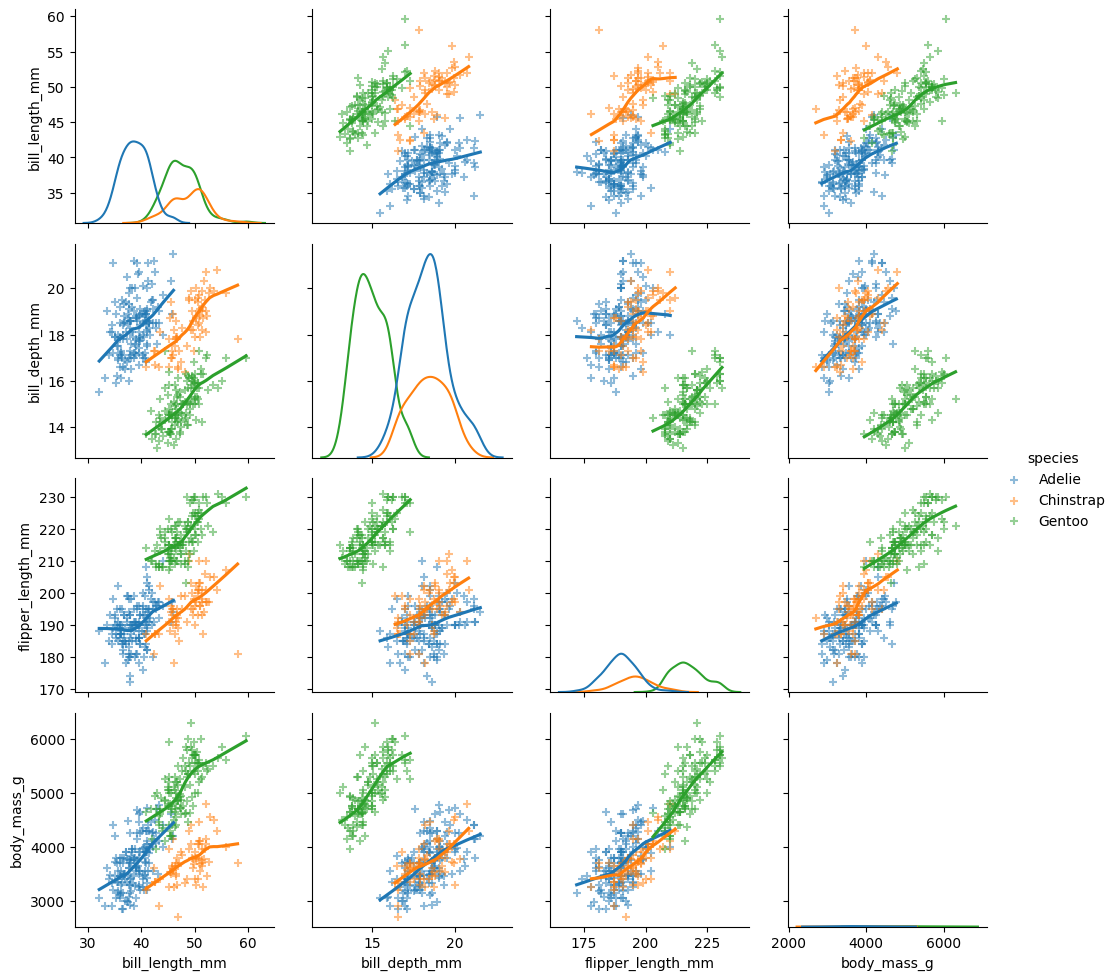

In [65]:
g = sns.PairGrid(penguins.to_pandas(), hue='species')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()